<a href="https://colab.research.google.com/github/TALIFHANIN/MIT-801-Assignment-/blob/main/copy_of_ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARY**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

**#load dataset from cifar with keras  and store in keras directory**

In [ ]:
#load dataset from cifar with keras library and load the dataset and store in keras directory
pic_class = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = pic_class.load_data()

#print the shape of training, testing, and label data
print('Training Data Shape: ', x_train.shape)
print('Testing Data Shape: ', x_test.shape)

print('Label Training Data Shape: ', y_train.shape)
print('Label Testing Data Shape: ', y_test.shape)

Training Data Shape:  (50000, 32, 32, 3)
Testing Data Shape:  (10000, 32, 32, 3)
Label Training Data Shape:  (50000, 1)
Label Testing Data Shape:  (10000, 1)


**Checking number of labels**

In [ ]:

classes = np.unique(y_train)
nClasses = len(classes)
print('Number of Outputs: ', nClasses)
print('Number of Output Classes: ', classes)



Number of Outputs:  10
Number of Output Classes:  [0 1 2 3 4 5 6 7 8 9]


**Display 1 st image for train and test with label**

Text(0.5, 1.0, '(Label: Frog)')
Text(0.5, 1.0, '(Label: Cat)')


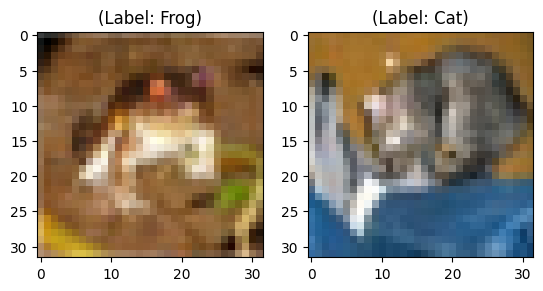

In [ ]:
#display 1st image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_list[y_train[0][0]]) + ")"))

#display 1st image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_list[y_test[0][0]]) + ")"))

In [ ]:
#check max and min values of dataset
np.min(x_train), np.max(x_train)

(0, 255)

In [ ]:
#normalize pixels between 0 and 1
x_train = x_train/255.0
np.min(x_train), np.max(x_train)
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#flatten images
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel' + str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat, columns = feat_cols)
df_cifar['Label'] = y_train
print('Size of Data Frame: {}'.format(df_cifar.shape))

Size of Data Frame: (50000, 3073)


In [ ]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,Label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [ ]:
#create PCA method
pca_cifar = PCA(n_components = 2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:, :-1])

In [ ]:
#convert principal components
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar,
                                  columns = ['Principal Component 1', 'Principal Component 2'])
principal_cifar_Df['Label'] = y_train
principal_cifar_Df.head()

,Principal Component 1,Principal Component 2,Label
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [ ]:


#variance of principal components
print('Explained Variation per Principal Component: {}'.format(pca_cifar.explained_variance_ratio_))



Explained Variation per Principal Component: [0.2907663  0.11253144]


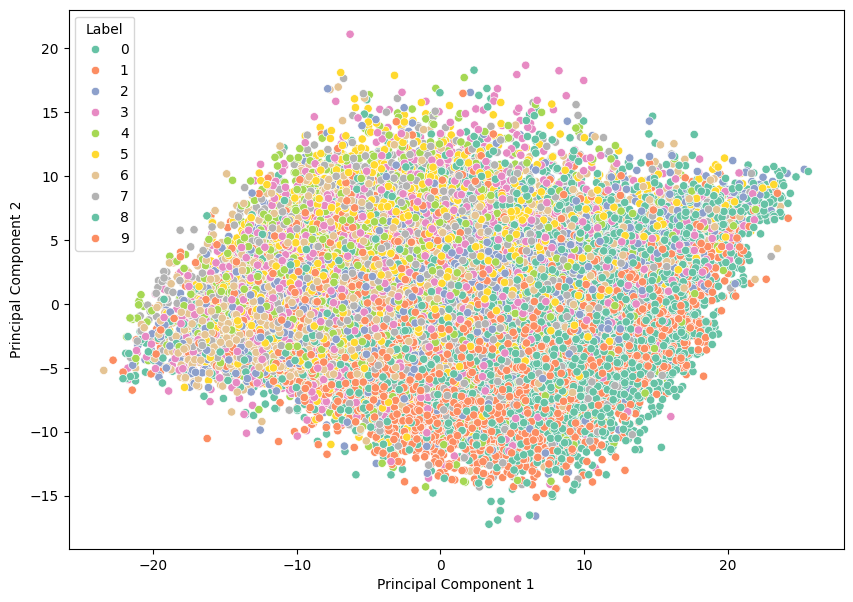

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="Principal Component 1", y="Principal Component 2",
    hue="Label",
    palette=sns.color_palette("Set2", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=1.0
)

# Save the image
plt.savefig("scatter_plot.png")

plt.show()

In [ ]:
#reshape dataset and determine number of variance
x_test = x_test/255.0
x_test = x_test.reshape(-1, 32, 32, 3)
x_test_flat = x_test.reshape(-1, 3072)

**number of features for different variances**

In [ ]:
#99%
pca = PCA(0.99)
pca.fit(x_train_flat)
PCA(copy = True, iterated_power = 'auto', n_components = 0.99, random_state = None, svd_solver = 'auto', tol = 0.0, whiten = False)
pca.n_components_

658

In [ ]:
#95%
pca_95 = PCA(0.95)
pca_95.fit(x_train_flat)
PCA(copy = True, iterated_power = 'auto', n_components = 0.95, random_state = None, svd_solver = 'auto', tol = 0.0, whiten = False)
pca_95.n_components_

217

In [ ]:
#90%
pca_90 = PCA(0.90)
pca_90.fit(x_train_flat)
PCA(copy = True, iterated_power = 'auto', n_components = 0.90, random_state = None, svd_solver = 'auto', tol = 0.0, whiten = False)
pca_90.n_components_

99

In [ ]:
#99
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)
#95
train_img_pca_95 = pca_95.transform(x_train_flat)
test_img_pca_95 = pca_95.transform(x_test_flat)
#90
train_img_pca_90 = pca_90.transform(x_train_flat)
test_img_pca_90 = pca_90.transform(x_test_flat)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
#define batch size, number of classes, and epoch
batch_size = 128
num_classes = 10
epochs = 100

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


**Training Fusion Model with 658 features 217 features and 99 features**

In [ ]:
# Define function to create model
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

# Create models for each set of features and print summaries
model_658 = create_model((658,))
print("658 features summary...")
model_658.summary()

model_217 = create_model((217,))
print("217 features summary...")
model_217.summary()

model_99 = create_model((99,))
print("99 features summary...")
model_99.summary()

# Train each model separately
print("Training model with 658 features...")
history_658 = model_658.fit(train_img_pca, y_train_encoded,
                            batch_size=batch_size, epochs=epochs,
                            verbose=1, validation_data=(test_img_pca, y_test_encoded),callbacks=[callback])
print("*"*100)
print("Training model with 217 features...")
history_217 = model_217.fit(train_img_pca_95, y_train_encoded,
                            batch_size=batch_size, epochs=epochs,
                            verbose=1, validation_data=(test_img_pca_95, y_test_encoded),callbacks=[callback])
print("Training model with 99 features...")
history_99 = model_99.fit(train_img_pca_90, y_train_encoded,
                          batch_size=batch_size, epochs=epochs,
                          verbose=1, validation_data=(test_img_pca_90, y_test_encoded),callbacks=[callback])


658 features summary...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               84352     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 93258 (364.29 KB)
Trainable params: 93258 (364.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
217 features summary...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               27904     
              

**Training Logistic Regression with 658 features 217 features 99 features**

In [ ]:
# Define function to create model
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(num_classes, activation='sigmoid', input_shape=input_shape))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

# Create models for each set of features and print summaries
logit_658 = create_model((658,))
print("658 features summary...")
logit_658.summary()

logit_217 = create_model((217,))
print("217 features summary...")
logit_217.summary()

logit_99 = create_model((99,))
print("99 features summary...")
logit_99.summary()

# Train each model separately
print("Training model with 658 features...")
history_658 = logit_658.fit(train_img_pca, y_train_encoded,
                            batch_size=batch_size, epochs=epochs,
                            verbose=1, validation_data=(test_img_pca, y_test_encoded),callbacks=[callback])
print("*"*100)
print("Training model with 217 features...")
history_217 = logit_217.fit(train_img_pca_95, y_train_encoded,
                            batch_size=batch_size, epochs=epochs,
                            verbose=1, validation_data=(test_img_pca_95, y_test_encoded),callbacks=[callback])
print("Training model with 99 features...")
history_99 = logit_99.fit(train_img_pca_90, y_train_encoded,
                          batch_size=batch_size, epochs=epochs,
                          verbose=1, validation_data=(test_img_pca_90, y_test_encoded),callbacks=[callback])


658 features summary...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                6590      
                                                                 
Total params: 6590 (25.74 KB)
Trainable params: 6590 (25.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
217 features summary...
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                2180      
                                                                 
Total params: 2180 (8.52 KB)
Trainable params: 2180 (8.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
99 features summary...
Model: "sequential_5"
_____

**Training Fusion Net on Original data with 3072 features**

In [ ]:
#compile and train full dataset
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (3072,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
print("model summary")
model.summary()
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

model summary
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               393344    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
origanaldataFusion = model.fit(x_train_flat, y_train_encoded,
                            batch_size=batch_size, epochs=epochs,
                            verbose=1, validation_data=(x_test_flat, y_test_encoded),callbacks=[callback])

Epoch 1/100
391/391 [==============================] - 7s 15ms/step - loss: 1.9140 - accuracy: 0.3117 - val_loss: 1.7779 - val_accuracy: 0.3624
Epoch 2/100
391/391 [==============================] - 7s 17ms/step - loss: 1.7429 - accuracy: 0.3809 - val_loss: 1.6915 - val_accuracy: 0.3941
Epoch 3/100
391/391 [==============================] - 6s 14ms/step - loss: 1.6653 - accuracy: 0.4083 - val_loss: 1.6351 - val_accuracy: 0.4202
Epoch 4/100
391/391 [==============================] - 7s 17ms/step - loss: 1.6157 - accuracy: 0.4257 - val_loss: 1.5995 - val_accuracy: 0.4307
Epoch 5/100
391/391 [==============================] - 6s 17ms/step - loss: 1.5702 - accuracy: 0.4412 - val_loss: 1.5825 - val_accuracy: 0.4342
Epoch 6/100
391/391 [==============================] - 7s 17ms/step - loss: 1.5379 - accuracy: 0.4505 - val_loss: 1.5092 - val_accuracy: 0.4625
Epoch 7/100
391/391 [==============================] - 5s 14ms/step - loss: 1.5113 - accuracy: 0.4604 - val_loss: 1.5639 - val_accuracy:

**Logistic Regression on original dataset with 3072 features**

In [ ]:
model = Sequential()
model.add(Dense(num_classes, activation='sigmoid', input_shape = (3072,)))
model.summary()
model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                30730     
                                                                 
Total params: 30730 (120.04 KB)
Trainable params: 30730 (120.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
origanaldataLogistic = model.fit(x_train_flat, y_train_encoded,
                            batch_size=batch_size, epochs=epochs,
                            verbose=1, validation_data=(x_test_flat, y_test_encoded),callbacks=[callback])

Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 1.9318 - accuracy: 0.3150 - val_loss: 1.8373 - val_accuracy: 0.3585
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.8303 - accuracy: 0.3600 - val_loss: 1.8682 - val_accuracy: 0.3485
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7997 - accuracy: 0.3732 - val_loss: 1.8003 - val_accuracy: 0.3651
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7820 - accuracy: 0.3812 - val_loss: 1.7671 - val_accuracy: 0.3846
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7713 - accuracy: 0.3850 - val_loss: 1.7888 - val_accuracy: 0.3729
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7542 - accuracy: 0.3931 - val_loss: 1.7610 - val_accuracy: 0.3898
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 1.7540 - accuracy: 0.3931 - val_loss: 1.7737 - val_accuracy: 0.3834